# CNN Dogs vs Cats Classifier

TensorFlow: 2.20.0
GPU: False

Found 557 files belonging to 2 classes.
Found 140 files belonging to 2 classes.
Found 140 files belonging to 2 classes.
Classes: ['cats', 'dogs']

Classes: ['cats', 'dogs']



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    16,777,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,870,850 (64.36 MB)

 Trainable params: 16,870,850 (64.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.5386 - loss: 1.1391 - val_accuracy: 0.5214 - val_loss: 0.6906
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.5386 - loss: 1.1391 - val_accuracy: 0.5214 - val_loss: 0.6906
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.5530 - loss: 0.6843 - val_accuracy: 0.5429 - val_loss: 0.7006
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.5530 - loss: 0.6843 - val_accuracy: 0.5429 - val_loss: 0.7006
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.6607 - loss: 0.6427 - val_accuracy: 0.6214 - val_loss: 0.6787
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.6607 - loss: 0.6427 - val_accuracy: 0.6214 - val_loss: 0.6787
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.6912 - loss: 0.5883 - val_accuracy: 0.6286 - val_loss: 0.6553
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.6912 - loss: 0.5883 - val_accuracy: 0.6286 - val_loss:

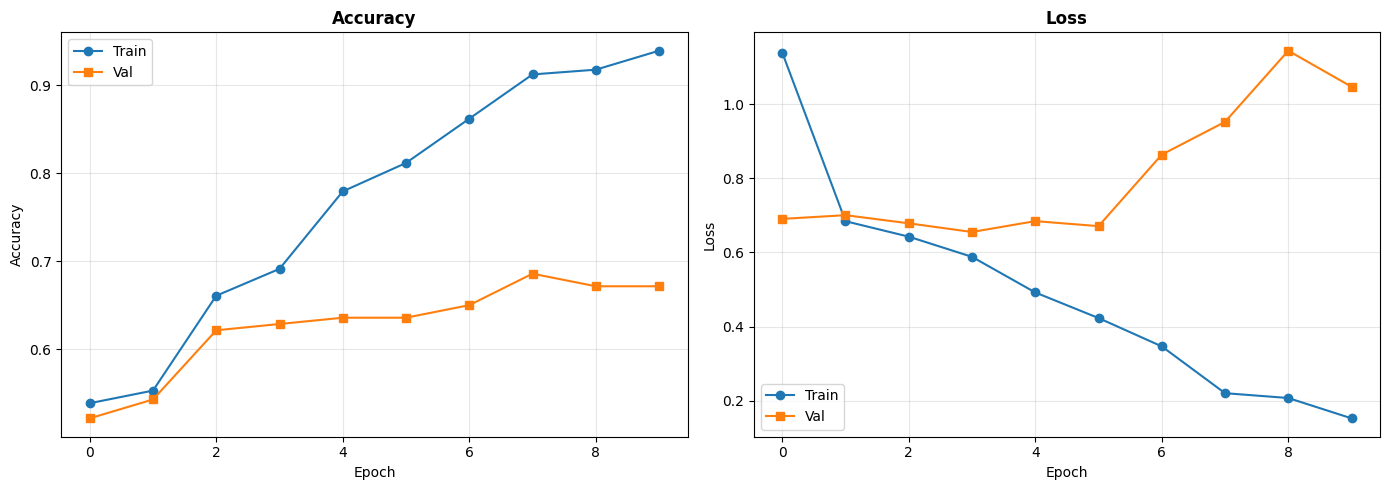

Model ready!


In [1]:
# CNN Dogs vs Cats - Complete Code
try:
    import tensorflow as tf
    from tensorflow.keras import layers, models
    print(f"TensorFlow: {tf.__version__}")
    print(f"GPU: {len(tf.config.list_physical_devices('GPU')) > 0}\n")
except ImportError as e:
    print("ERROR: TensorFlow import failed!")
    print(str(e))
    print("\nSOLUTION:")
    print("1. Download: https://aka.ms/vs/17/release/vc_redist.x64.exe")
    print("2. Install it")
    print("3. Restart notebook")
    raise SystemExit("Fix DLL error first!")

import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

# Load datasets
raw_train_ds = tf.keras.utils.image_dataset_from_directory(
    r"D:\5Th_Semester\CIT-316(AI Sessional )\Dogs_Cats\train",
    image_size=(256, 256),
    batch_size=32
)

raw_test_ds = tf.keras.utils.image_dataset_from_directory(
    r"D:\5Th_Semester\CIT-316(AI Sessional )\Dogs_Cats\test",
    image_size=(256, 256),
    batch_size=32
)

class_names = raw_train_ds.class_names
print(f"Classes: {class_names}\n")

# Normalize and optimize
train_ds = raw_train_ds.map(lambda x, y: (x / 255.0, y))
test_ds = raw_test_ds.map(lambda x, y: (x / 255.0, y))

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Build CNN model
model = models.Sequential([
    layers.Input(shape=(256, 256, 3)),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

model.summary()

# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(train_ds, validation_data=test_ds, epochs=10, verbose=1)

# Evaluate
loss, accuracy = model.evaluate(test_ds, verbose=0)
print(f"Test Accuracy: {accuracy*100:.2f}%")
print(f"Test Loss: {loss:.4f}")

# Plot graphs
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train', marker='o')
plt.plot(history.history['val_accuracy'], label='Val', marker='s')
plt.title('Accuracy', fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train', marker='o')
plt.plot(history.history['val_loss'], label='Val', marker='s')
plt.title('Loss', fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Prediction function
def predict_image(img_path):
    if not os.path.exists(img_path):
        print(f"File not found: {img_path}")
        return
    
    img = cv2.imread(img_path)
    if img is None:
        print(f"Cannot read: {img_path}")
        return
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(6, 6))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"{os.path.basename(img_path)}", fontweight='bold')
    plt.show()
    
    img_resized = cv2.resize(img_rgb, (256, 256))
    img_normalized = img_resized.reshape((1, 256, 256, 3)) / 255.0
    
    prediction = model.predict(img_normalized, verbose=0)
    predicted_idx = np.argmax(prediction[0])
    confidence = np.max(prediction[0]) * 100
    
    if confidence >= 60:
        print(f"Prediction: {class_names[predicted_idx].upper()}")
        print(f"Confidence: {confidence:.2f}%")
    else:
        print(f"Prediction: NEITHER")
        print(f"Confidence: {confidence:.2f}%")
    
    print("\nProbabilities:")
    for i, name in enumerate(class_names):
        prob = prediction[0][i] * 100
        bar = "█" * int(prob / 2)
        print(f"  {name}: {prob:5.2f}% {bar}")

print("Model ready!")

## Test Predictions

Cat Image:


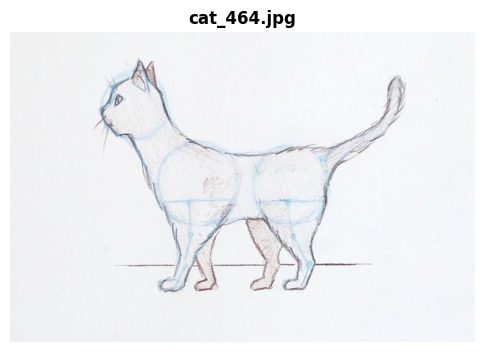

Prediction: CATS
Confidence: 68.13%

Probabilities:
  cats: 68.13% ██████████████████████████████████
  dogs: 31.87% ███████████████

Dog Image:


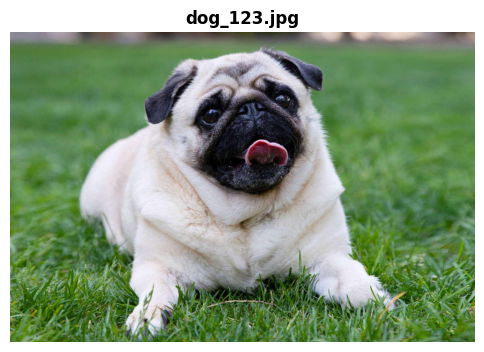

Prediction: DOGS
Confidence: 99.81%

Probabilities:
  cats:  0.19% 
  dogs: 99.81% █████████████████████████████████████████████████


In [4]:
cat_path = r"Dogs_Cats\test\cats\cat_464.jpg"
dog_path = r"Dogs_Cats/test/dogs/dog_123.jpg"

print("Cat Image:")
predict_image(cat_path)

print("\nDog Image:")
predict_image(dog_path)